In [12]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import warnings 

In [13]:
# Import master table
df = pd.read_csv('..\Data Wrangling - Capstone 2/master.csv', index_col=0)
df.head()

,ID,Tower,Floor,Unit,Area,Flat Type,No. of Rooms,Price,Price per SA,PL_no,Date_PASP,Date_ASP,Trans_Price,Payment_Terms,first_sale
0,One_VicTower 1A1A,Tower 1A,1,A,643,3BR + 2B + 1K,3BR,"16,137,000","25,096",PL1,03/07/2021,03/07/2021,"$13,958,000",A,03/07/2021
1,One_VicTower 1A1B,Tower 1A,1,B,444,2BR + 1B + 1OK,2BR,"10,613,000","23,903",PL1,03/07/2021,03/07/2021,"$9,604,000",C,03/07/2021
2,One_VicTower 1A1C,Tower 1A,1,C,438,2BR + 1B + 1OK,2BR,"10,739,000","24,518",PL1,10/07/2021,10/07/2021,"$9,718,000",C,NaN
3,One_VicTower 1A1D,Tower 1A,1,D,444,2BR + 1B + 1OK,2BR,"11,355,000","25,574",PL2,03/07/2021,03/07/2021,"$9,822,000",A,03/07/2021
4,One_VicTower 1A1E,Tower 1A,1,E,426,2BR + 1B + 1OK,2BR,"11,009,000","25,843",PL2,03/07/2021,03/07/2021,"$9,963,000",C,03/07/2021


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 1048
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1049 non-null   object
 1   Tower          1049 non-null   object
 2   Floor          1049 non-null   int64 
 3   Unit           1049 non-null   object
 4   Area           1049 non-null   int64 
 5   Flat Type      1049 non-null   object
 6   No. of Rooms   1049 non-null   object
 7   Price          685 non-null    object
 8   Price per SA   685 non-null    object
 9   PL_no          685 non-null    object
 10  Date_PASP      501 non-null    object
 11  Date_ASP       501 non-null    object
 12  Trans_Price    501 non-null    object
 13  Payment_Terms  501 non-null    object
 14  first_sale     400 non-null    object
dtypes: int64(2), object(13)
memory usage: 131.1+ KB


In [15]:
df.shape

(1049, 15)

In [100]:
df.columns

Index(['ID', 'Tower', 'Floor', 'Unit', 'Area', 'Flat Type', 'No. of Rooms',
       'Price', 'Price per SA', 'PL_no', 'Date_PASP', 'Date_ASP',
       'Trans_Price', 'Payment_Terms', 'first_sale'],
      dtype='object')

In [16]:
# Clean data types
df['Price'] = pd.to_numeric(df['Price'].str.replace(",", "", regex=True))

df['Trans_Price'] = df['Trans_Price'].str.replace(",", "", regex=True)
df['Trans_Price'] = pd.to_numeric(df['Trans_Price'].str.replace("$","", regex=True))

df['Price per SA'] = df['Price per SA'].str.replace(",", "", regex=True)
df['Price per SA'] = pd.to_numeric(df['Price per SA'].str.replace("$","", regex=True))

df['Date_PASP'] = pd.to_datetime(df['Date_PASP'])

df['Date_ASP'] = pd.to_datetime(df['Date_ASP'])

df['first_sale'] = pd.to_datetime(df['first_sale'])

df.head()

,ID,Tower,Floor,Unit,Area,Flat Type,No. of Rooms,Price,Price per SA,PL_no,Date_PASP,Date_ASP,Trans_Price,Payment_Terms,first_sale
0,One_VicTower 1A1A,Tower 1A,1,A,643,3BR + 2B + 1K,3BR,16137000.0,25096.0,PL1,2021-03-07,2021-03-07,13958000.0,A,2021-03-07
1,One_VicTower 1A1B,Tower 1A,1,B,444,2BR + 1B + 1OK,2BR,10613000.0,23903.0,PL1,2021-03-07,2021-03-07,9604000.0,C,2021-03-07
2,One_VicTower 1A1C,Tower 1A,1,C,438,2BR + 1B + 1OK,2BR,10739000.0,24518.0,PL1,2021-10-07,2021-10-07,9718000.0,C,NaT
3,One_VicTower 1A1D,Tower 1A,1,D,444,2BR + 1B + 1OK,2BR,11355000.0,25574.0,PL2,2021-03-07,2021-03-07,9822000.0,A,2021-03-07
4,One_VicTower 1A1E,Tower 1A,1,E,426,2BR + 1B + 1OK,2BR,11009000.0,25843.0,PL2,2021-03-07,2021-03-07,9963000.0,C,2021-03-07


In [17]:
# More correlation if closer to 1 or -1.
df.corr(method ='pearson')

,Floor,Area,Price,Price per SA,Trans_Price
Floor,1.000000,0.030433,0.217573,0.805774,0.117684
Area,0.030433,1.000000,0.961327,0.371631,0.957518
Price,0.217573,0.961327,1.000000,0.603836,0.996907
Price per SA,0.805774,0.371631,0.603836,1.000000,0.505694
Trans_Price,0.117684,0.957518,0.996907,0.505694,1.000000


In [18]:
df.corr(method ='kendall')

,Floor,Area,Price,Price per SA,Trans_Price
Floor,1.000000,0.005542,0.239014,0.624491,0.141685
Area,0.005542,1.000000,0.731834,0.185690,0.740651
Price,0.239014,0.731834,1.000000,0.471601,0.936425
Price per SA,0.624491,0.185690,0.471601,1.000000,0.307765
Trans_Price,0.141685,0.740651,0.936425,0.307765,1.000000


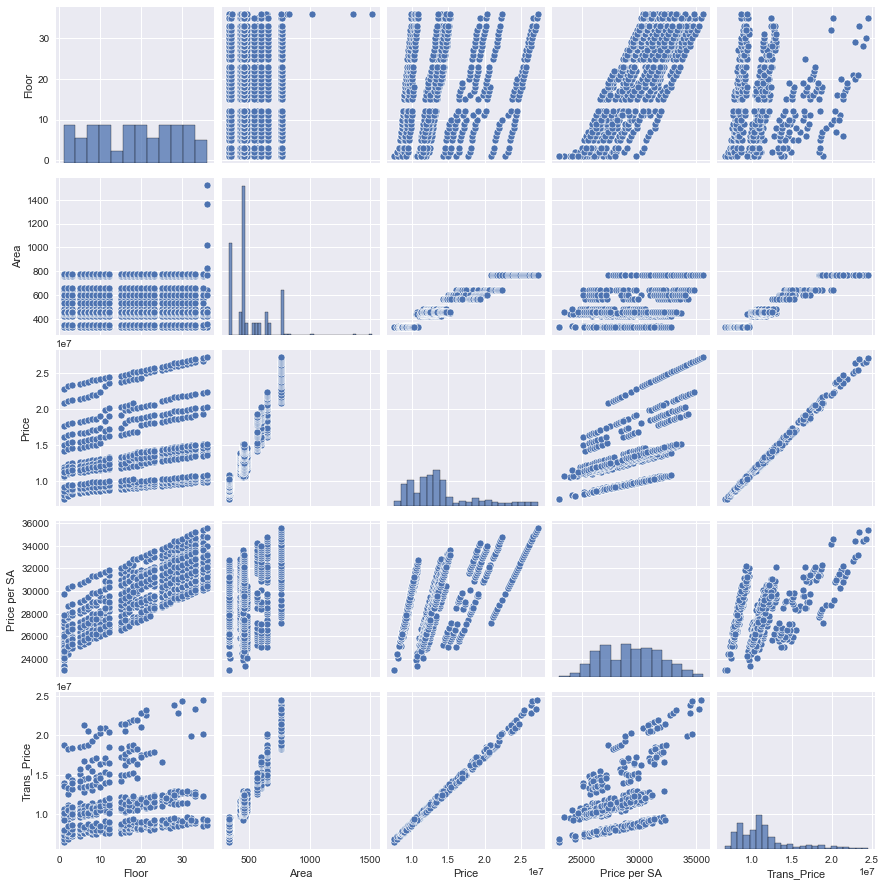

In [69]:
sns.pairplot(df)
plt.show()

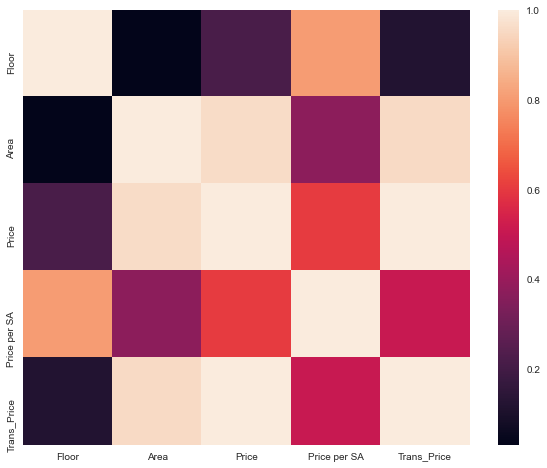

In [72]:
# Make a heatmap of the data 
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr());
plt.show()

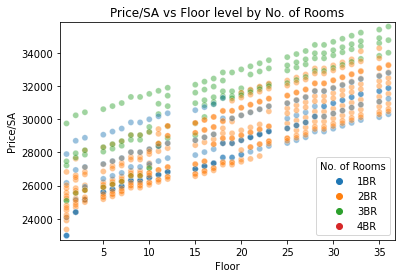

In [48]:
# Relationship between price per SA and floor level, grouped by no. of rooms
sns.scatterplot(x='Floor', y='Price per SA', data=df, hue='No. of Rooms', hue_order=['1BR','2BR','3BR','4BR'], alpha=0.45)
plt.margins(0.02)
plt.xlabel('Floor')
plt.ylabel('Price/SA')
plt.title('Price/SA vs Floor level by No. of Rooms')
plt.show()


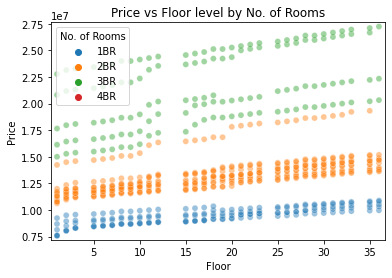

In [42]:
# Relationship between price and floor level, grouped by no. of rooms
sns.scatterplot(x='Floor', y='Price', data=df, hue='No. of Rooms', hue_order=['1BR','2BR','3BR','4BR'], alpha=0.45)
plt.margins(0.02)
plt.xlabel('Floor')
plt.ylabel('Price')
plt.title('Price vs Floor level by No. of Rooms')
plt.show()


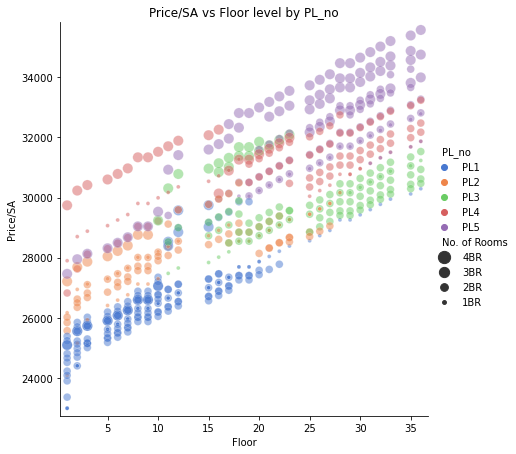

In [78]:
# Relationship between price per SA and floor level, grouped by Price List
sns.relplot(x='Floor', y='Price per SA', data=df, hue='PL_no', hue_order=['PL1','PL2','PL3','PL4','PL5'], size='No. of Rooms',
            sizes=(15, 150), size_order = ['4BR','3BR','2BR','1BR'], palette="muted", height = 6, alpha=0.5)
plt.margins(0.02)
plt.xlabel('Floor')
plt.ylabel('Price/SA')
plt.title('Price/SA vs Floor level by PL_no')
plt.show()


Text(0.5, 1.0, 'Average Price/SA vs PL_no')

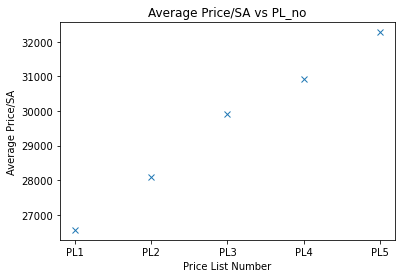

In [65]:
PL_mean = df.groupby('PL_no')['Price per SA'].mean()
plt.plot(PL_mean, marker = 'x', linestyle='None')
plt.xlabel('Price List Number')
plt.ylabel('Average Price/SA')
plt.title('Average Price/SA vs PL_no')


Later launched Price Lists tend to be higher priced, for more desirable high level flats.

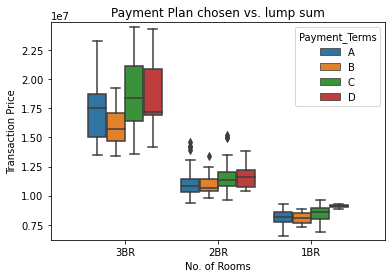

In [99]:
# Relationship between transaction price, payment plan, no. of rooms
sns.boxplot(x='No. of Rooms', y='Trans_Price', data=df, hue='Payment_Terms', hue_order=['A','B','C','D'])
plt.margins(0.02)
plt.xlabel('No. of Rooms')
plt.ylabel('Transaction Price')
plt.title('Payment Plan chosen vs. lump sum')
plt.show()

Payment_Terms
A    1.350161e+07
B    1.253314e+07
C    1.238986e+07
D    1.383157e+07
Name: Price, dtype: float64


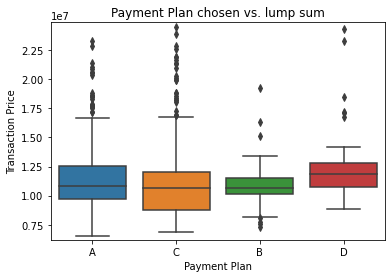

In [96]:
# Relationship between transaction price and payment plan
Payment_plan_mean = df.groupby('Payment_Terms')['Price'].mean()
print(Payment_plan_mean)

sns.boxplot(x='Payment_Terms', y='Trans_Price', data=df)
plt.margins(0.02)
plt.xlabel('Payment Plan')
plt.ylabel('Transaction Price')
plt.title('Payment Plan chosen vs. lump sum')
plt.show()

No notable differences observed from the payment plans vs. lump sum.

In [115]:
# Create test and train datasets
# Floor, Unit and Tower can affect views. 
# require cleaning: No. of rooms, payment plan, unit, tower, price list number

X = df.loc[:, df.columns.isin(['Floor', 'Area'])]

# target variable: Price per SA and Price
y = df['Price per SA']

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [116]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 1048
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   const   1049 non-null   float64
 1   Floor   1049 non-null   int64  
 2   Area    1049 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 65.1 KB


In [117]:
# Create the model
model = sm.OLS(y_train,X_train)

# Fit the model
results = model.fit()

# Evaluate the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price per SA   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 10 Nov 2021   Prob (F-statistic):                nan
Time:                        17:14:02   Log-Likelihood:                    nan
No. Observations:                 786   AIC:                               nan
Df Residuals:                     783   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
Floor             nan        nan        nan        nan         nan         nan
Area              nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     2.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""